In [5]:
# !pip install tensorflow

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 93s 1us/step


C:\Users\Gokulvasan V\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3476 - loss: 1.7609 - val_accuracy: 0.5380 - val_loss: 1.2874
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5695 - loss: 1.2155 - val_accuracy: 0.5978 - val_loss: 1.1352
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6367 - loss: 1.0370 - val_accuracy: 0.6535 - val_loss: 0.9739
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6788 - loss: 0.9164 - val_accuracy: 0.6767 - val_loss: 0.9364
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7021 - loss: 0.8436 - val_accuracy: 0.6739 - val_loss: 0.9445
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7257 - loss: 0.7845 - val_accuracy: 0.6898 - val_loss: 0.8947
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7435 - loss: 0.7299 - val_accuracy: 0.6960 - val_loss: 0.8814
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7703 - loss: 

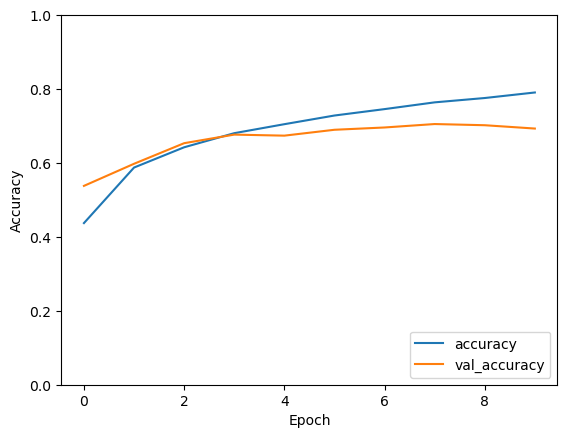

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


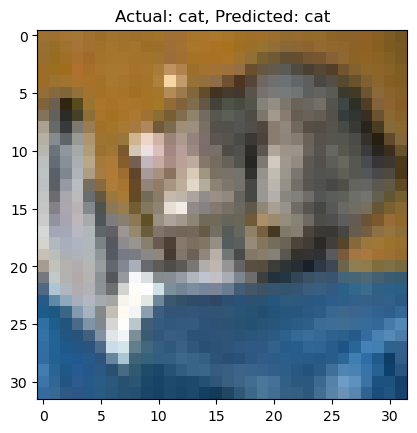

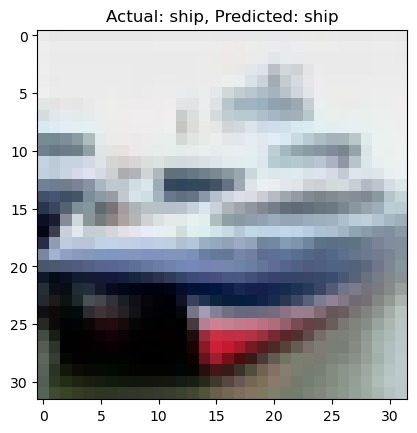

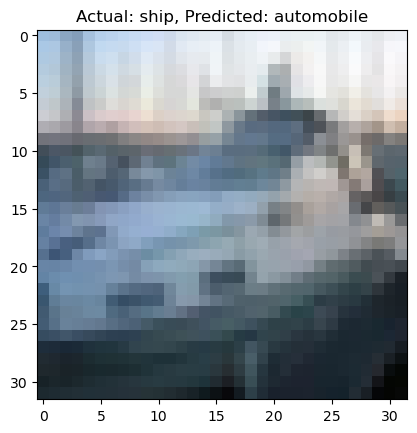

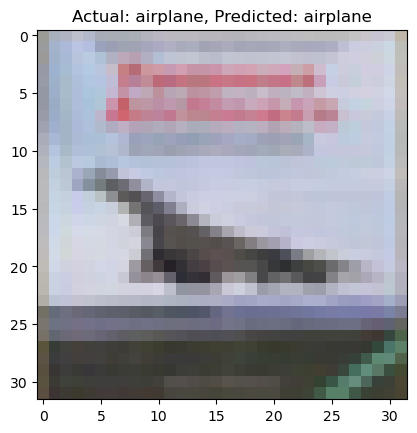

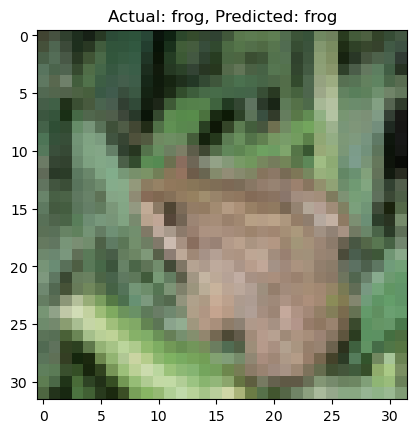

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize the data (scale the pixel values to range [0, 1])
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build a simple CNN model
model = models.Sequential()

# First Convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the data to feed it into Dense layers
model.add(layers.Flatten())

# Fully connected Dense layer
model.add(layers.Dense(64, activation='relu'))

# Output layer (10 categories for CIFAR-10)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualizing a few test images with predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Displaying the first 5 images and their predicted labels
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Actual: {class_names[np.argmax(y_test[i])]}, Predicted: {class_names[np.argmax(y_pred[i])]}")
    plt.show()